In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.impute import KNNImputer

In [2]:
data =pd.read_csv('diabetes.csv')

In [9]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,224.400000,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,61.933333,26.6,0.351,31,0
2,8,183.0,64.0,27.266667,282.066667,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


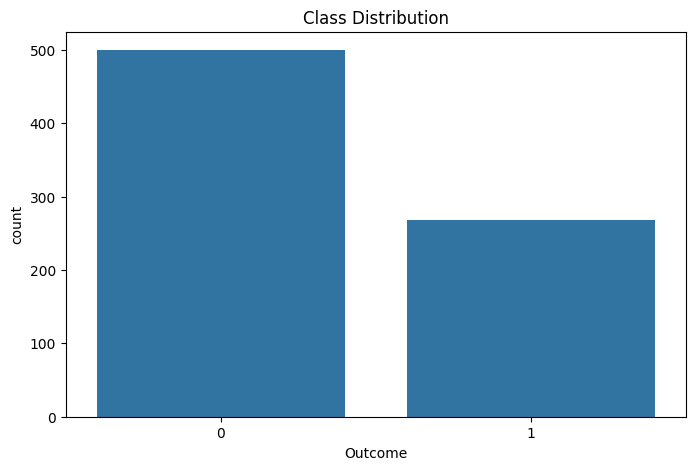

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Outcome', data=data)
plt.title("Class Distribution")
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.duplicated().sum()

0

In [3]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


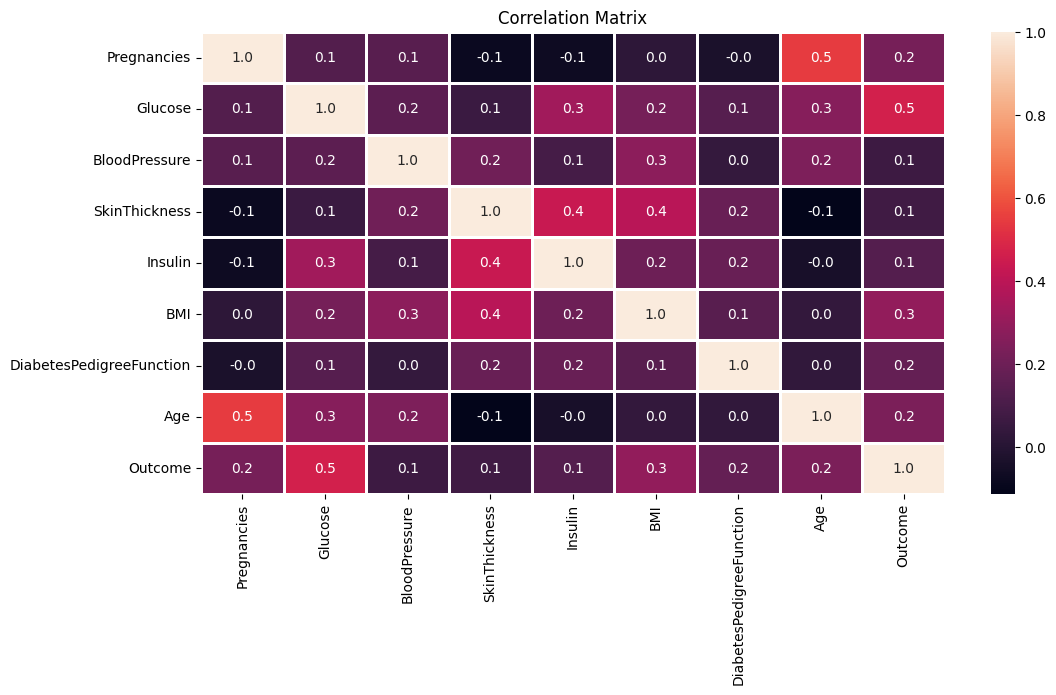

In [5]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, fmt='0.1f', linewidth=1)
plt.title("Correlation Matrix")
plt.show()

In [3]:
lst=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for i in lst:
    num_zeros = (data[i] == 0).sum()
    print(num_zeros)

5
35
227
374
11


In [4]:

lst = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for i in lst:
    data[i].replace(0, np.nan, inplace=True)

imputer = KNNImputer(n_neighbors=10)
data[lst] = imputer.fit_transform(data[lst])


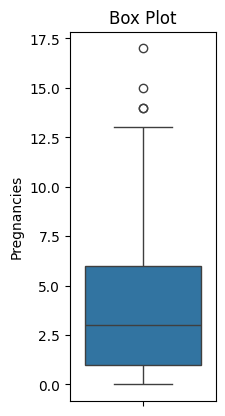

In [5]:
plt.subplot(1, 3, 3)
sns.boxplot(y=data["Pregnancies"])
plt.title('Box Plot')
plt.show()

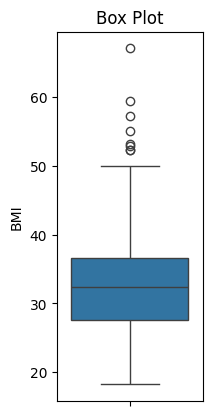

In [6]:
plt.subplot(1, 3, 3)
sns.boxplot(y=data["BMI"])
plt.title('Box Plot')
plt.show()

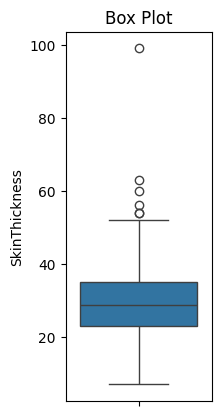

In [7]:
plt.subplot(1, 3, 3)
sns.boxplot(y=data["SkinThickness"])
plt.title('Box Plot')
plt.show()

In [8]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1

print("---Q1--- \n",Q1)
print("\n---Q3--- \n",Q3)
print("\n---IQR---\n",IQR)

data_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape,data_out.shape

---Q1--- 
 Pregnancies                  1.00000
Glucose                     99.75000
BloodPressure               64.00000
SkinThickness               22.90000
Insulin                     88.97500
BMI                         27.50000
DiabetesPedigreeFunction     0.24375
Age                         24.00000
Outcome                      0.00000
Name: 0.25, dtype: float64

---Q3--- 
 Pregnancies                   6.00000
Glucose                     140.25000
BloodPressure                80.00000
SkinThickness                35.00000
Insulin                     190.00000
BMI                          36.60000
DiabetesPedigreeFunction      0.62625
Age                          41.00000
Outcome                       1.00000
Name: 0.75, dtype: float64

---IQR---
 Pregnancies                   5.0000
Glucose                      40.5000
BloodPressure                16.0000
SkinThickness                12.1000
Insulin                     101.0250
BMI                           9.1000
DiabetesPedigr

((768, 9), (679, 9))

In [9]:
X=data_out.drop(columns=['Outcome'])
y=data_out['Outcome']
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)
train_X.shape,test_X.shape,train_y.shape,test_y.shape

((543, 8), (136, 8), (543,), (136,))

In [10]:
clf = RandomForestClassifier(random_state=42)

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(clf, train_X, train_y, cv=cv, scoring='accuracy')

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {np.mean(cv_scores)}")

Cross-validation scores: [0.73394495 0.76146789 0.75229358 0.75       0.7962963 ]
Mean cross-validation score: 0.758800543662929


In [11]:
clf = LogisticRegression(random_state=42, max_iter=1000)

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(clf, train_X, train_y, cv=cv, scoring='accuracy')

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {np.mean(cv_scores)}")


Cross-validation scores: [0.75229358 0.81651376 0.79816514 0.72222222 0.78703704]
Mean cross-validation score: 0.775246347264696


In [12]:
clf = DecisionTreeClassifier(random_state=42)

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(clf, train_X, train_y, cv=cv, scoring='accuracy')

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {np.mean(cv_scores)}")



Cross-validation scores: [0.70642202 0.66972477 0.70642202 0.73148148 0.68518519]
Mean cross-validation score: 0.6998470948012232


In [22]:

param_grid = {
    'C': [10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

clf = LogisticRegression(random_state=42, max_iter=1000)

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(train_X, train_y)

# Best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Predict on the test set with the best model
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(test_X)

accuracy = accuracy_score(test_y, y_pred)
print("Accuracy:", accuracy)



Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.8014705882352942


In [19]:
import sys

def predict_diabetes():
    print("Enter the following details to predict diabetes:")
    pregnancies = float(input("Pregnancies: "))
    glucose = float(input("Glucose: "))
    blood_pressure = float(input("BloodPressure: "))
    skin_thickness = float(input("SkinThickness: "))
    insulin = float(input("Insulin: "))
    bmi = float(input("BMI: "))
    diabetes_pedigree_function = float(input("DiabetesPedigreeFunction: "))
    age = float(input("Age: "))

    user_data = pd.DataFrame({
        'Pregnancies': [pregnancies],
        'Glucose': [glucose],
        'BloodPressure': [blood_pressure],
        'SkinThickness': [skin_thickness],
        'Insulin': [insulin],
        'BMI': [bmi],
        'DiabetesPedigreeFunction': [diabetes_pedigree_function],
        'Age': [age]
    })

    prediction = best_clf.predict(user_data)

    # Display the result
    print(f"Prediction (0: No Diabetes, 1: Diabetes): {prediction[0]}")

predict_diabetes()


Enter the following details to predict diabetes:
Pregnancies: 0
Glucose: 180
BloodPressure: 66
SkinThickness: 39
Insulin: 0
BMI: 42
DiabetesPedigreeFunction: 1.8
Age: 25
Prediction (0: No Diabetes, 1: Diabetes): 1
